Ejercicio 1

In [22]:
!pip install fiona

In [23]:
from  fiona import listlayers

LinkSpain1="https://github.com/XimenaMamani-ctrl/introgeodf/raw/refs/heads/mai/mapas/spainMaps1_4326.gpkg"

#layers in maps
listlayers(LinkSpain1)

#Faltan 'states' y 'border'

['country', 'cities', 'rivers', 'airports', 'municipalities']

In [24]:
import geopandas as gpd

municipalities=gpd.read_file(LinkSpain1,layer='municipalities')
airports=gpd.read_file(LinkSpain1,layer='airports')
rivers=gpd.read_file(LinkSpain1,layer='rivers')


#faltan states y border

In [25]:
country=gpd.read_file(LinkSpain1,layer='country')

In [26]:
cities=gpd.read_file(LinkSpain1,layer='cities')

In [27]:
country.head()

,COUNTRY,geometry
0,Spain,"MULTIPOLYGON (((-773283.69 4903648.197, -76924..."


In [28]:
airports.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           552 non-null    object  
 1   kind           552 non-null    object  
 2   latitude_deg   552 non-null    float64 
 3   longitude_deg  552 non-null    float64 
 4   elevation_ft   431 non-null    float64 
 5   region_name    552 non-null    object  
 6   municipality   476 non-null    object  
 7   geometry       552 non-null    geometry
dtypes: float64(3), geometry(1), object(4)
memory usage: 34.6+ KB


In [29]:
import pandas as pd

portsFileLink="https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/raw/main/data/UpdatedPub150.csv"
infoseaports=pd.read_csv(portsFileLink)

#columns available (so many)
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [30]:
#rename
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
#keep few columns
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

# we have now
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3739 non-null   object 
 1   Country Code  3739 non-null   object 
 2   Latitude      3739 non-null   float64
 3   Longitude     3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


In [31]:
# some rows
infoseaports.head()

,portName,Country Code,Latitude,Longitude
0,Maurer,United States,40.533333,-74.250000
1,Mangkasa Oil Terminal,Indonesia,-2.733333,121.066667
2,Iharana,Madagascar,-13.350000,50.000000
3,Andoany,Madagascar,-13.400000,48.300000
4,Chake Chake,Tanzania,-5.250000,39.766667


In [32]:
seaports = gpd.GeoDataFrame(
    data=infoseaports.copy(),
    geometry=gpd.points_from_xy(infoseaports.Longitude, infoseaports.Latitude),
    crs=4326  # Sistema de coordenadas geográficas (no proyectado)
)

# Filtrar los puertos que pertenecen a España
seaports_spa = seaports[seaports['Country Code'] == 'Spain'].copy()

# Restablecer los índices
seaports_spa.reset_index(drop=True, inplace=True)

# Reproyectar al sistema UTM correspondiente a España (EPSG:25830)
seaports_spa_5641 = seaports_spa.to_crs(25830)

In [33]:
seaports_spa_5641.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   portName      52 non-null     object  
 1   Country Code  52 non-null     object  
 2   Latitude      52 non-null     float64 
 3   Longitude     52 non-null     float64 
 4   geometry      52 non-null     geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 2.2+ KB


<Axes: >

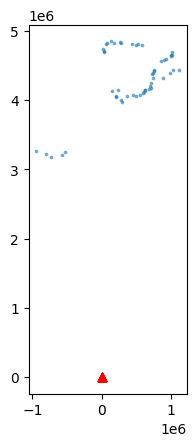

In [34]:
# subsetting
largeAirports=airports[airports['kind']=='large_airport'] #can't use "airports.type"
largeAirports.reset_index(drop=True, inplace=True)

#plotting
base=largeAirports.plot(color='red',marker="^")
seaports_spa_5641.plot(ax=base,alpha=0.5,markersize=3)

In [35]:
seaports_spa_5641.head()

,portName,Country Code,Latitude,Longitude,geometry
0,Hornillo,Spain,37.400000,-1.550000,POINT (628339.958 4140233.65)
1,La Coruna,Spain,43.366667,-8.400000,POINT (62443.867 4815714.16)
2,Alicante,Spain,38.333333,-0.483333,POINT (719969.232 4245797.488)
3,Sevilla,Spain,37.366667,-6.000000,POINT (234326.747 4139772.668)
4,Ceuta,Spain,35.900000,-5.316667,POINT (290923.08 3975336.381)


In [36]:
largeAirports.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Adolfo Suárez Madrid–Barajas Airport,large_airport,40.471926,-3.56264,1998.0,Madrid (community),Madrid,POINT (-3.56264 40.47193)
1,Palma de Mallorca Airport,large_airport,39.551701,2.73881,27.0,Islas Baleares,Palma de Mallorca,POINT (2.73881 39.5517)
2,Málaga-Costa del Sol Airport,large_airport,36.674900,-4.49911,53.0,Andalucía,Málaga,POINT (-4.49911 36.6749)
3,Gran Canaria Airport,large_airport,27.931900,-15.38660,78.0,Canary Islands,Gran Canaria Island,POINT (-15.3866 27.9319)
4,Tenerife Sur Airport,large_airport,28.044500,-16.57250,209.0,Canary Islands,Tenerife,POINT (-16.5725 28.0445)


In [37]:
# distance between 'Guarulhos' and 'Dtse / Gegua Oil Terminal'
largeAirports.iloc[0].geometry.distance(seaports_spa_5641.iloc[0].geometry)/1000  # in km

4187.602551966554

In [38]:
#try 1: default
seaports_spa_5641.geometry.apply\
(lambda g: largeAirports.geometry.distance(g)/1000)

<ipython-input-38-f0511027f9af>:3: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.geometry.distance(g)/1000)


,0,1,2,3,4,5,6,7,8,9
0,4187.602552,4187.602516,4187.606447,4187.616724,4187.616791,4187.604266,4187.603392,4187.615455,4187.615981,4187.600883
1,4816.078566,4816.079404,4816.082375,4816.091258,4816.091161,4816.080717,4816.080101,4816.090222,4816.090718,4816.076205
2,4306.368942,4306.368796,4306.372843,4306.383283,4306.383370,4306.370599,4306.369694,4306.381986,4306.382515,4306.367363
3,4146.359047,4146.359610,4146.362891,4146.372235,4146.372190,4146.361063,4146.360364,4146.371122,4146.371629,4146.356901
4,3985.927230,3985.927687,3985.931085,3985.940599,3985.940573,3985.929194,3985.928464,3985.939458,3985.939969,3985.925166
5,4053.297889,4053.298490,4053.301728,4053.311010,4053.310957,4053.299924,4053.299237,4053.309908,4053.310413,4053.295713
6,4132.592537,4132.593228,4132.596365,4132.605496,4132.605427,4132.594616,4132.593956,4132.604419,4132.604921,4132.590289
7,4828.380402,4828.381222,4828.384214,4828.393129,4828.393035,4828.382544,4828.381923,4828.392087,4828.392584,4828.378055
8,4833.694135,4833.694683,4833.697981,4833.707349,4833.707307,4833.696144,4833.695441,4833.706233,4833.706740,4833.692000
9,4011.296819,4011.297296,4011.300673,4011.310157,4011.310128,4011.298793,4011.298069,4011.309021,4011.309531,4011.294741


In [39]:
# try 2: see names (change indexes)

seaports_spa_5641.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000)

<ipython-input-39-bae4e28b3362>:4: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000)


name,Adolfo Suárez Madrid–Barajas Airport,Palma de Mallorca Airport,Málaga-Costa del Sol Airport,Gran Canaria Airport,Tenerife Sur Airport,Alicante-Elche Miguel Hernández Airport,Ibiza Airport,César Manrique-Lanzarote Airport,Fuerteventura Airport,Santiago-Rosalía de Castro Airport
portName,,,,,,,,,,
Hornillo,4187.602552,4187.602516,4187.606447,4187.616724,4187.616791,4187.604266,4187.603392,4187.615455,4187.615981,4187.600883
La Coruna,4816.078566,4816.079404,4816.082375,4816.091258,4816.091161,4816.080717,4816.080101,4816.090222,4816.090718,4816.076205
Alicante,4306.368942,4306.368796,4306.372843,4306.383283,4306.383370,4306.370599,4306.369694,4306.381986,4306.382515,4306.367363
Sevilla,4146.359047,4146.359610,4146.362891,4146.372235,4146.372190,4146.361063,4146.360364,4146.371122,4146.371629,4146.356901
Ceuta,3985.927230,3985.927687,3985.931085,3985.940599,3985.940573,3985.929194,3985.928464,3985.939458,3985.939969,3985.925166
Cadiz,4053.297889,4053.298490,4053.301728,4053.311010,4053.310957,4053.299924,4053.299237,4053.309908,4053.310413,4053.295713
Huelva,4132.592537,4132.593228,4132.596365,4132.605496,4132.605427,4132.594616,4132.593956,4132.604419,4132.604921,4132.590289
Ferrol,4828.380402,4828.381222,4828.384214,4828.393129,4828.393035,4828.382544,4828.381923,4828.392087,4828.392584,4828.378055
Gijon,4833.694135,4833.694683,4833.697981,4833.707349,4833.707307,4833.696144,4833.695441,4833.706233,4833.706740,4833.692000


In [40]:
#try 3: reorder previous output

seaports_spa_5641.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).sort_index(axis=0).sort_index(axis=1)
#es como un salto de línea (?) es para que la línea de código no sea muy larga
#aparentemente no deja \

<ipython-input-40-dc8f711bb6c7>:4: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).sort_index(axis=0).sort_index(axis=1)


name,Adolfo Suárez Madrid–Barajas Airport,Alicante-Elche Miguel Hernández Airport,César Manrique-Lanzarote Airport,Fuerteventura Airport,Gran Canaria Airport,Ibiza Airport,Málaga-Costa del Sol Airport,Palma de Mallorca Airport,Santiago-Rosalía de Castro Airport,Tenerife Sur Airport
portName,,,,,,,,,,
Adra,4095.522026,4095.523835,4095.534686,4095.535206,4095.535908,4095.523014,4095.525908,4095.522174,4095.520208,4095.535940
Aguilas,4187.359145,4187.360860,4187.372045,4187.372571,4187.373314,4187.359987,4187.363039,4187.359111,4187.357474,4187.373380
Algeciras,4011.296819,4011.298793,4011.309021,4011.309531,4011.310157,4011.298069,4011.300673,4011.297296,4011.294741,4011.310128
Alicante,4306.368942,4306.370599,4306.381986,4306.382515,4306.383283,4306.369694,4306.372843,4306.368796,4306.367363,4306.383370
Almeria,4113.086329,4113.088099,4113.099090,4113.099612,4113.100331,4113.087256,4113.090217,4113.086402,4113.084572,4113.100378
Arrecife,3291.421367,3291.424011,3291.431127,3291.431572,3291.431841,3291.423739,3291.424963,3291.423289,3291.418193,3291.431539
Aviles,4838.754282,4838.756305,4838.766338,4838.766844,4838.767447,4838.755610,4838.758125,4838.754858,4838.752126,4838.767399
Barcelona,4684.182065,4684.183613,4684.195359,4684.195894,4684.196707,4684.182649,4684.185972,4684.181712,4684.180655,4684.196833
Bermeo,4835.445677,4835.447529,4835.458222,4835.458740,4835.459422,4835.446733,4835.449553,4835.445911,4835.443792,4835.459439


In [41]:
distanceMatrixKM_sea_air= seaports_spa_5641.set_index('portName').geometry.apply\
                          (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

<ipython-input-41-4ba826132483>:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\


In [42]:
# the mean distance from a seaport to all the large airports (sorted)
distanceMatrixKM_sea_air.mean(axis=1).sort_values(ascending=True) #axis=0?
#la distancia promedio de los seaport a los aeropuertos

,0
portName,
Puerto Del Rosario,3250.594156
Las Palmas,3258.574879
Arrecife,3291.426164
Santa Cruz De Tenerife,3319.639596
Santa Cruz De La Palma,3399.068212
Ceuta,3985.932943
Algeciras,4011.302523
Cadiz,4053.303527
Rota,4062.509768


In [43]:
SomeStats=pd.DataFrame()
SomeStats['mean']=distanceMatrixKM_sea_air.mean(axis=1)
SomeStats['min']=distanceMatrixKM_sea_air.min(axis=1)
SomeStats['max']=distanceMatrixKM_sea_air.max(axis=1)

# see some
SomeStats.head(10)

,mean,min,max
portName,,,
Adra,4095.527890,4095.520208,4095.535940
Aguilas,4187.365093,4187.357474,4187.373380
Algeciras,4011.302523,4011.294741,4011.310157
Alicante,4306.374939,4306.367363,4306.383370
Almeria,4113.092229,4113.084572,4113.100378
Arrecife,3291.426164,3291.418193,3291.431841
Aviles,4838.759934,4838.752126,4838.767447
Barcelona,4684.188146,4684.180655,4684.196833
Bermeo,4835.451502,4835.443792,4835.459439


In [44]:
# farthest airport to each seaport
# El índice es el nombre del aeropuerto (row index)
distanceMatrixKM_sea_air.idxmax(axis=1)

,0
portName,
Adra,Tenerife Sur Airport
Aguilas,Tenerife Sur Airport
Algeciras,Gran Canaria Airport
Alicante,Tenerife Sur Airport
Almeria,Tenerife Sur Airport
Arrecife,Gran Canaria Airport
Aviles,Gran Canaria Airport
Barcelona,Tenerife Sur Airport
Bermeo,Tenerife Sur Airport


In [45]:
# farthest seaport to each airport
distanceMatrixKM_sea_air.idxmax(axis=0)

,0
name,
Adolfo Suárez Madrid–Barajas Airport,San Ciprian
Alicante-Elche Miguel Hernández Airport,San Ciprian
César Manrique-Lanzarote Airport,San Ciprian
Fuerteventura Airport,San Ciprian
Gran Canaria Airport,San Ciprian
Ibiza Airport,San Ciprian
Málaga-Costa del Sol Airport,San Ciprian
Palma de Mallorca Airport,San Ciprian
Santiago-Rosalía de Castro Airport,San Ciprian


In [46]:
# closest airport to each seaport
distanceMatrixKM_sea_air.idxmin(axis=1)

,0
portName,
Adra,Santiago-Rosalía de Castro Airport
Aguilas,Santiago-Rosalía de Castro Airport
Algeciras,Santiago-Rosalía de Castro Airport
Alicante,Santiago-Rosalía de Castro Airport
Almeria,Santiago-Rosalía de Castro Airport
Arrecife,Santiago-Rosalía de Castro Airport
Aviles,Santiago-Rosalía de Castro Airport
Barcelona,Santiago-Rosalía de Castro Airport
Bermeo,Santiago-Rosalía de Castro Airport


In [47]:
# closest seaport to each airport
distanceMatrixKM_sea_air.idxmin(axis=0)

,0
name,
Adolfo Suárez Madrid–Barajas Airport,Puerto Del Rosario
Alicante-Elche Miguel Hernández Airport,Puerto Del Rosario
César Manrique-Lanzarote Airport,Puerto Del Rosario
Fuerteventura Airport,Puerto Del Rosario
Gran Canaria Airport,Puerto Del Rosario
Ibiza Airport,Puerto Del Rosario
Málaga-Costa del Sol Airport,Puerto Del Rosario
Palma de Mallorca Airport,Puerto Del Rosario
Santiago-Rosalía de Castro Airport,Puerto Del Rosario


Ejercicio 2


In [48]:
# 1. Descargar el archivo .7z desde GitHub
!wget -O archivo.7z "https://github.com/XimenaMamani-ctrl/introgeodf/raw/refs/heads/mai/mapas/esp_rivers.7z"

# 2. Instalar p7zip para descomprimir el archivo
!apt-get install p7zip-full

# 3. Descomprimir el archivo .7z
!7z x archivo.7z

--2024-11-27 14:03:46--  https://github.com/XimenaMamani-ctrl/introgeodf/raw/refs/heads/mai/mapas/esp_rivers.7z
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/XimenaMamani-ctrl/introgeodf/refs/heads/mai/mapas/esp_rivers.7z [following]
--2024-11-27 14:03:46--  https://raw.githubusercontent.com/XimenaMamani-ctrl/introgeodf/refs/heads/mai/mapas/esp_rivers.7z
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72156604 (69M) [application/octet-stream]
Saving to: ‘archivo.7z’

archivo.7z          100%[===================>]  68.81M   130MB/s    in 0.5s    

2024-11-27 14:03:48 (130 MB/s) - ‘archivo.7z’ s

In [49]:
rivers = gpd.read_file('esp_rivers.gpkg')

/usr/local/lib/python3.10/dist-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'esp_rivers.gpkg': 'rivers' (default), 'layer_styles'. Specify layer parameter to avoid this warning.
  result = read_func(


In [50]:
rivers.head()

,name,name:en,waterway,covered,width,depth,layer,blockage,tunnel,natural,water,source,name:es,osm_id,osm_type,geometry
0,None,None,stream,None,None,None,None,None,None,None,None,None,None,315274845,ways_line,"LINESTRING (-17.96048 27.82341, -17.96055 27.8..."
1,None,None,stream,None,None,None,-1,None,yes,None,None,None,None,315274849,ways_line,"LINESTRING (-17.96054 27.82323, -17.96048 27.8..."
2,None,None,stream,None,None,None,None,None,None,None,None,None,None,315274851,ways_line,"LINESTRING (-17.96059 27.82056, -17.96065 27.8..."
3,Río Pilón,None,stream,None,None,None,None,None,None,None,None,None,None,175673939,ways_line,"LINESTRING (-5.68672 43.51333, -5.6869 43.5133..."
4,Arroyo de Botafuego,None,stream,None,None,None,None,None,None,None,None,IDEE.es,None,101697328,ways_line,"LINESTRING (-5.52684 36.11695, -5.5264 36.1176..."


In [51]:
rivers = rivers.drop(index=[0, 1, 2, 5, 6, 7, 8, 9, 10, 11])

In [52]:
rivers = rivers.drop(columns=['name:en', 'covered', 'width', 'depth', 'layer', 'blockage', 'tunnel', 'natural', 'water', 'source', 'name:es'])

In [53]:
rivers_filt = rivers[rivers['waterway'] == 'river']

In [54]:
rivers_filt.head()

,name,waterway,osm_id,osm_type,geometry
49,None,river,1233521139,ways_line,"LINESTRING (-6.68589 37.58181, -6.68593 37.58173)"
66,Río Lezuza,river,402669137,ways_line,"LINESTRING (-2.39 38.92905, -2.38982 38.92899,..."
115,Río Genil,river,42205608,ways_line,"LINESTRING (-4.84535 37.41338, -4.84666 37.412..."
136,None,river,1215872032,ways_line,"LINESTRING (-4.861 37.4084, -4.86125 37.40845,..."
169,Río Guadaira,river,83506622,ways_line,"LINESTRING (-5.5258 37.10999, -5.52651 37.1101..."


In [55]:
#keep one:
rivers = rivers_filt[rivers_filt.name.str.contains('Guadaira', na=False)].head(1)
rivers

,name,waterway,osm_id,osm_type,geometry
169,Río Guadaira,river,83506622,ways_line,"LINESTRING (-5.5258 37.10999, -5.52651 37.1101..."


In [56]:
# distance from each airport to Rio Grande
rivers[rivers.name.str.contains('Río Guadaira')].iloc[0].geometry.distance(largeAirports.set_index('name').geometry)/1000

,geometry
name,
Adolfo Suárez Madrid–Barajas Airport,0.003830
Palma de Mallorca Airport,0.008618
Málaga-Costa del Sol Airport,0.001115
Gran Canaria Airport,0.013394
Tenerife Sur Airport,0.014190
Alicante-Elche Miguel Hernández Airport,0.005104
Ibiza Airport,0.007121
César Manrique-Lanzarote Airport,0.011426
Fuerteventura Airport,0.011964


In [57]:
distanceMatrixKM_riv_air=rivers.set_index('name').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_riv_air

<ipython-input-57-fa9a2b836209>:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\


name,Adolfo Suárez Madrid–Barajas Airport,Alicante-Elche Miguel Hernández Airport,César Manrique-Lanzarote Airport,Fuerteventura Airport,Gran Canaria Airport,Ibiza Airport,Málaga-Costa del Sol Airport,Palma de Mallorca Airport,Santiago-Rosalía de Castro Airport,Tenerife Sur Airport
name,,,,,,,,,,
Río Guadaira,0.00383,0.005104,0.011426,0.011964,0.013394,0.007121,0.001115,0.008618,0.006136,0.01419


In [58]:
distanceMatrixKM_riv_air.loc['Río Guadaira'].sort_values()

,Río Guadaira
name,
Málaga-Costa del Sol Airport,0.001115
Adolfo Suárez Madrid–Barajas Airport,0.003830
Alicante-Elche Miguel Hernández Airport,0.005104
Santiago-Rosalía de Castro Airport,0.006136
Ibiza Airport,0.007121
Palma de Mallorca Airport,0.008618
César Manrique-Lanzarote Airport,0.011426
Fuerteventura Airport,0.011964
Gran Canaria Airport,0.013394


In [59]:
!pip install folium matplotlib mapclassify

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 3.5 MB/s eta 0:00:00


In [60]:
base=largeAirports.explore(color='red',marker_kwds=dict(radius=10))
rivers[rivers.name.str.contains('Guadaira')].explore(m=base)

In [61]:
rivers_filt[~rivers_filt.osm_id.isna()]

,name,waterway,osm_id,osm_type,geometry
49,None,river,1233521139,ways_line,"LINESTRING (-6.68589 37.58181, -6.68593 37.58173)"
66,Río Lezuza,river,402669137,ways_line,"LINESTRING (-2.39 38.92905, -2.38982 38.92899,..."
115,Río Genil,river,42205608,ways_line,"LINESTRING (-4.84535 37.41338, -4.84666 37.412..."
136,None,river,1215872032,ways_line,"LINESTRING (-4.861 37.4084, -4.86125 37.40845,..."
169,Río Guadaira,river,83506622,ways_line,"LINESTRING (-5.5258 37.10999, -5.52651 37.1101..."
...,...,...,...,...,...
334590,Río Odiel,river,13257569,relations,"MULTILINESTRING ((-6.54031 37.80206, -6.54104 ..."
334595,Río Ouro,river,17950924,relations,"MULTILINESTRING ((-7.52726 43.45754, -7.52696 ..."
334597,Río Vero,river,17679220,relations,"MULTILINESTRING ((0.11232 42.04235, 0.11352 42..."
334598,Río Aguisejo,river,2578220,relations,"MULTILINESTRING ((-3.24399 41.29451, -3.24384 ..."


In [62]:
systems=rivers_filt.dissolve(by='osm_id')
systems

,geometry,name,waterway,osm_type
osm_id,,,,
69145,"LINESTRING (-14.35205 28.04931, -14.35202 28.0...",Barranco del Ciervo,river,relations
290000,"MULTILINESTRING ((-2.97396 37.83911, -2.97399 ...",Río Guadalquivir,river,relations
1226495,"MULTILINESTRING ((-6.0577 41.47465, -6.05743 4...",Río Esla,river,relations
1436523,"LINESTRING (-6.1865 42.95168, -6.18479 42.9505...",Río Luna,river,relations
1436525,"MULTILINESTRING ((-5.66658 41.95719, -5.66687 ...",Río Órbigo,river,relations
...,...,...,...,...
1329632977,"LINESTRING (1.04931 41.79398, 1.04928 41.79401...",el Sió,river,ways_line
1329632978,"LINESTRING (1.04941 41.79391, 1.04931 41.79398)",el Sió,river,ways_line
1329939128,"LINESTRING (-7.35558 42.75314, -7.35598 42.753...",Río Sarria,river,ways_line


In [63]:
# format the GDF:

systems.reset_index(drop=False,inplace=True)
systems.drop(columns='name',inplace=True)

# we have
systems

,osm_id,geometry,waterway,osm_type
0,69145,"LINESTRING (-14.35205 28.04931, -14.35202 28.0...",river,relations
1,290000,"MULTILINESTRING ((-2.97396 37.83911, -2.97399 ...",river,relations
2,1226495,"MULTILINESTRING ((-6.0577 41.47465, -6.05743 4...",river,relations
3,1436523,"LINESTRING (-6.1865 42.95168, -6.18479 42.9505...",river,relations
4,1436525,"MULTILINESTRING ((-5.66658 41.95719, -5.66687 ...",river,relations
...,...,...,...,...
15571,1329632977,"LINESTRING (1.04931 41.79398, 1.04928 41.79401...",river,ways_line
15572,1329632978,"LINESTRING (1.04941 41.79391, 1.04931 41.79398)",river,ways_line
15573,1329939128,"LINESTRING (-7.35558 42.75314, -7.35598 42.753...",river,ways_line
15574,1329939129,"LINESTRING (-7.35971 42.74703, -7.35991 42.747...",river,ways_line


In [ ]:
distanceMatrixKM_sys_air=systems.set_index('osm_id').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sys_air

<ipython-input-64-25eb4c71e62c>:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\


In [ ]:
mins=distanceMatrixKM_sys_air.idxmin(axis="columns") # same as axis=1
mins

In [ ]:
# one of them
mins.iloc[1]

In [ ]:
base=systems.explore()
# the closest
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
# NOT the closest
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

Ejercicio 3

In [ ]:
# polygon for each system
systems.convex_hull

In [ ]:
# see them
systems.convex_hull.plot()

In [ ]:
systems_hulls=systems.convex_hull.to_frame()
systems_hulls['osm_id'] = range(69145, 69145 + len(systems_hulls))
systems_hulls.rename(columns={0:'geometry'},inplace=True)
systems_hulls=systems_hulls.set_geometry('geometry')
systems_hulls.crs="EPSG:5641"
systems_hulls

In [ ]:
distanceMatrixKM_sysHull_air=systems_hulls.set_index('osm_id').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sysHull_air

In [ ]:
mins=distanceMatrixKM_sysHull_air.idxmin(axis="columns")
mins

In [ ]:
# plotting
base=systems_hulls.explore()
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

Ejercicio 4

In [ ]:
# remember:
distanceMatrixKM_riv_air

In [ ]:
# getting a value (it can be any value)
distanceMatrixKM_riv_air.loc['Río Guadaira'].min() # I chose min

In [ ]:
minMts=distanceMatrixKM_riv_air.loc['Río Guadaira'].min()*1000 # km

#the buffer is a polygon:
rivers[rivers.name=='Río Guadaira'].buffer(distance = minMts)

In [ ]:
# see buffer:
bufferAroundGuadaira=rivers[rivers.name=='Río Guadaira'].buffer(distance = minMts)
bufferAsBase=bufferAroundGuadaira.explore(color='red')
rivers[rivers.name=='Río Guadaira'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})

In [ ]:
small_airports=airports[airports['kind']=='small_airport']

# plotting
rivers[rivers.name=='Río Guadaira'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
small_airports.explore(m=bufferAsBase,color='black')

In [ ]:

riversWithinBuffer=small_airports.clip(mask=bufferAroundGuadaira)
#
riversWithinBuffer

In [ ]:
# plotting the airports within buffer
bufferAsBase=bufferAroundGuadaira.explore(color='red')
rivers[rivers.name=='Río Guadaira'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
riversWithinBuffer.explore(m=bufferAsBase,color='black')

In [ ]:
# minimum of all the minimum by row
distanceMatrixKM_riv_air.min(axis=1).min()

In [ ]:
# using the previous value
minMinMts_5=5*distanceMatrixKM_riv_air.min(axis=1).min()*1000


allMinBuffer=rivers_filt.buffer(distance = minMinMts_5).explore(color='red')
rivers_filt.explore(m=allMinBuffer,color='blue',style_kwds={'weight':0.5})